In [51]:
import pandas as pd
df = pd.read_csv('C:/Users/Specter/Desktop/resources/Data Files/7. ST Academy - Time Series resource files/daily-min-temperatures.csv', header =0, parse_dates=[0])
df['t']= df['Temp'].shift(1)
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


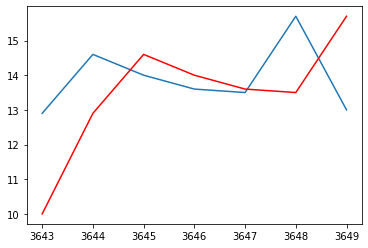

In [52]:
predictions = test_X.copy()
print(predictions)
print(test_y)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse
from matplotlib import pyplot
pyplot.plot(test_y)
pyplot.plot(predictions, color = 'red')

In [53]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [54]:
from statsmodels.tsa.ar_model import AR

In [57]:
model = AR(train)

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

In [56]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]


In [58]:
model_fit = model.fit()

In [59]:
model_fit.k_ar

29

In [60]:
predictions = model_fit.predict(start = len(train), end = len(train)+len(test)-1)

In [61]:
predictions

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64

In [71]:
from sklearn.metrics import mean_squared_error

In [84]:
mse = mean_squared_error(test.values, predict)
mse


1.45245684251851

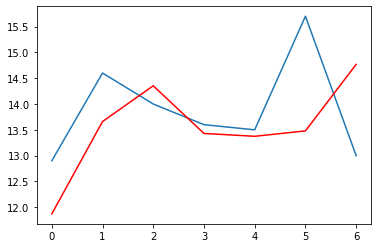

In [86]:
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

In [65]:
data = train

In [66]:
predict = []

In [70]:
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start = len(data), end = len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)

11.871274847727838
13.660699943835196
14.353164144090155
13.430120791627004
13.374756477185125
13.479111299420525
14.767773018439854


C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

In [69]:
import numpy as np

In [75]:
test.values

array([12.9, 14.6, 14. , 13.6, 13.5, 15.7, 13. ])

In [77]:
predict

[11.871274847727838,
 11.871274847727838,
 13.660699943835196,
 14.353164144090155,
 13.430120791627004,
 13.374756477185125,
 13.479111299420525,
 14.767773018439854]

In [82]:
predict.pop(0)

11.871274847727838

In [83]:
predict

[11.871274847727838,
 13.660699943835196,
 14.353164144090155,
 13.430120791627004,
 13.374756477185125,
 13.479111299420525,
 14.767773018439854]

In [89]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/Specter/Desktop/resources/Data Files/7. ST Academy - Time Series resource files/daily-min-temperatures.csv', header =0, parse_dates=[0])
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']
from statsmodels.tsa.ar_model import AR
data = train
predict = []
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start = len(data), end = len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

KeyError: 't'

11.871274847727838
13.660699943835196
14.353164144090155
13.430120791627004
13.374756477185125
13.479111299420525
14.767773018439854


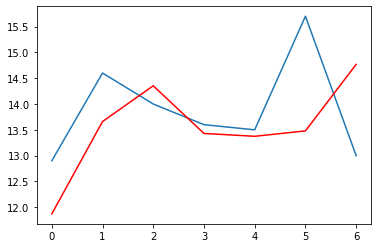

In [91]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/Specter/Desktop/resources/Data Files/7. ST Academy - Time Series resource files/daily-min-temperatures.csv', header =0, parse_dates=[0])
df['t']= df['Temp'].shift(1)
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']
from statsmodels.tsa.ar_model import AR
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]
data = train
predict = []
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start = len(data), end = len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse
pyplot.plot(test.values)
pyplot.plot(predict, color='red')